<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1pLsegkAICL9PzOLyAeH9DmDOBfktte0l8JW75uWcTng). 

In [264]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix,hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [3]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [4]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [5]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [886]:
train_df

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
6,570,2014-03-18 15:18:31,21.0,2014-03-18 15:18:39,570.0,2014-03-18 15:23:02,21.0,2014-03-18 15:23:43,21.0,2014-03-18 15:29:57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,803,2014-02-13 16:45:35,23.0,2014-02-13 16:45:35,5956.0,2014-02-13 16:45:35,17513.0,2014-02-13 16:45:35,37.0,2014-02-13 16:46:05,...,2014-02-13 16:47:14,803.0,2014-02-13 16:47:14,17514.0,2014-02-13 16:47:15,17514.0,2014-02-13 16:47:16,17514.0,2014-02-13 16:47:17,0
8,22,2013-04-12 10:27:26,21.0,2013-04-12 10:27:26,29.0,2013-04-12 10:27:28,5041.0,2013-04-12 10:27:29,14422.0,2013-04-12 10:27:29,...,2013-04-12 10:27:29,21.0,2013-04-12 10:27:29,5041.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:31,14421.0,2013-04-12 10:27:32,0
9,668,2014-03-17 16:23:08,940.0,2014-03-17 16:23:35,942.0,2014-03-17 16:23:35,941.0,2014-03-17 16:23:35,941.0,2014-03-17 16:23:36,...,2014-03-17 16:23:36,940.0,2014-03-17 16:23:36,23.0,2014-03-17 16:23:52,21.0,2014-03-17 16:23:52,22.0,2014-03-17 16:23:53,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


In [7]:
test_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
site1     82797 non-null int64
time1     82797 non-null object
site2     81308 non-null float64
time2     81308 non-null object
site3     80075 non-null float64
time3     80075 non-null object
site4     79182 non-null float64
time4     79182 non-null object
site5     78341 non-null float64
time5     78341 non-null object
site6     77566 non-null float64
time6     77566 non-null object
site7     76840 non-null float64
time7     76840 non-null object
site8     76151 non-null float64
time8     76151 non-null object
site9     75484 non-null float64
time9     75484 non-null object
site10    74806 non-null float64
time10    74806 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [9]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [10]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [11]:
train_test_df_sites.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178
6,570,21,570,21,21,0,0,0,0,0
7,803,23,5956,17513,37,21,803,17514,17514,17514
8,22,21,29,5041,14422,23,21,5041,14421,14421
9,668,940,942,941,941,942,940,23,21,22


**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

In [12]:
from tqdm import tqdm_notebook

def spar(sessions):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for s in tqdm_notebook(sessions):
        for ID in s:
            index = vocabulary.setdefault(ID, ID)
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))

    return csr_matrix((data, indices, indptr), dtype=int)[:,1:]   

In [13]:
train_test_sparse = spar(train_test_df_sites.values)


In [14]:
train_test_sparse

<336358x48371 sparse matrix of type '<class 'numpy.int32'>'
	with 3195430 stored elements in Compressed Sparse Row format>

In [15]:
X_train_sparse = train_test_sparse[:253561]
X_test_sparse = train_test_sparse[253561:]
y = train_df['target']

**<font color='red'>Вопрос 1. </font> Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [16]:
print(f'{X_train_sparse.shape[0]} {X_train_sparse.shape[1]} {X_test_sparse.shape[0]} {X_test_sparse.shape[1]}')

253561 48371 82797 48371


**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [23]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [17]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [18]:
sgd_logit = SGDClassifier(loss='log',random_state=17,n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=17, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [19]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)
logit_valid_pred_proba

array([[9.11911413e-01, 8.80885865e-02],
       [9.99703507e-01, 2.96493343e-04],
       [9.99872654e-01, 1.27345522e-04],
       ...,
       [9.87751880e-01, 1.22481202e-02],
       [9.99943934e-01, 5.60663172e-05],
       [9.88685254e-01, 1.13147460e-02]])

**<font color='red'>Вопрос 2. </font> Посчитайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [20]:
ROC_AUC = roc_auc_score(y_valid,logit_valid_pred_proba[:,1])
print(round(ROC_AUC,3))

0.934


**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [21]:
%%time
sgd_logit.fit(X_train_sparse,y)
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)
logit_test_pred_proba[:,1]

Wall time: 1.12 s


array([1.24441919e-02, 5.64920887e-05, 1.81927605e-05, ...,
       1.17325100e-02, 5.00373821e-03, 1.04058395e-03])

**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

In [39]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [45]:
write_to_submission_file(logit_test_pred_proba[:,1],out_file='submission0.csv')

Качество меньше 0,92. Для его улучшения дальше будут попытки применения дополнительных признаков, преобразования уже имеющихся, а также использование разных алгоритмов и подбор параметров по сетке с проверкой качества на отложенной выборке.

In [74]:
param_grid = {'alpha': [0.00001,0.0001,0.00015,0.0002,0.001,0.1,1],
             'l1_ratio':[0,0.1,0.15,0.5],
             'class_weight': ['balanced',None,{1:1000,0:0.001}]}
clf = SGDClassifier(loss='log',n_jobs=-1,random_state=17)

In [75]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)


sgd_grid_searcher = GridSearchCV(clf,param_grid,cv=skf,n_jobs=-1,return_train_score=True,scoring='roc_auc')
sgd_grid_searcher.fit(X_train, y_train)
sgd_grid_searcher.best_estimator_

SGDClassifier(alpha=0.00015, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=17, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
sgd_grid_searcher.best_score_,sgd_grid_searcher.best_params_

(0.951513819753326,
 {'alpha': 0.00015, 'class_weight': 'balanced', 'l1_ratio': 0})

In [77]:
ROC_AUC1 = roc_auc_score(y_valid,sgd_grid_searcher.best_estimator_.predict_proba(X_valid)[:,1])
print(round(ROC_AUC1,3))

0.954


In [162]:
param_grid_check = {'learning_rate': ['optimal','invscaling','adaptive']}
             
clf_check = SGDClassifier(loss='log',random_state=91,learning_rate = 'adaptive',eta0=100)

In [163]:
sgd_grid_searcher_ch = GridSearchCV(clf_check,param_grid_check,cv=skf,n_jobs=-1,return_train_score=True,scoring='roc_auc')
sgd_grid_searcher_ch.fit(X_train, y_train)
sgd_grid_searcher_ch.cv_results_

{'mean_fit_time': array([0.78323619, 1.31702367, 6.46206959]),
 'std_fit_time': array([0.00307037, 0.08237754, 0.31865358]),
 'mean_score_time': array([0.06683683, 0.05967339, 0.03644864]),
 'std_score_time': array([0.01021984, 0.02432507, 0.00736362]),
 'param_learning_rate': masked_array(data=['optimal', 'invscaling', 'adaptive'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 'optimal'},
  {'learning_rate': 'invscaling'},
  {'learning_rate': 'adaptive'}],
 'split0_test_score': array([0.94394674, 0.89581283, 0.94342185]),
 'split1_test_score': array([0.93292481, 0.88278921, 0.9369264 ]),
 'split2_test_score': array([0.94741185, 0.93723055, 0.94846061]),
 'mean_test_score': array([0.9414278 , 0.90527753, 0.94293629]),
 'std_test_score': array([0.0061767 , 0.02321135, 0.00472132]),
 'rank_test_score': array([2, 3, 1]),
 'split0_train_score': array([0.9594461 , 0.92439843, 0.9622461 ]),
 'split1_train_score': a

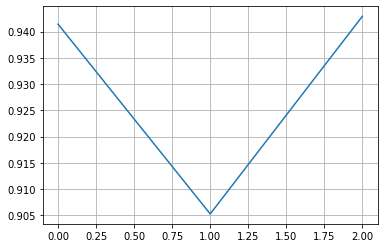

In [164]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(range(3),sgd_grid_searcher_ch.cv_results_['mean_test_score'])
plt.grid()

In [224]:
%%time
sgd_grid2 = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)
sgd_grid2.fit(X_train,y_train) 
ROC_AUC2 = roc_auc_score(y_valid,sgd_grid2.predict_proba(X_valid)[:,1])
print(round(ROC_AUC2,3))

0.957
Wall time: 4.91 s


In [ ]:
ROC_AUC2 = roc_auc_score(y_valid,sgd_grid2.predict_proba(X_valid)[:,1])
print(round(ROC_AUC2,3))

In [226]:
sgd_grid2 = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)
sgd_grid2.fit(X_train_sparse,y)
logit_grid_test_pred_proba2 = sgd_grid2.predict_proba(X_test_sparse)
logit_grid_test_pred_proba2[:,1]



array([1.02492600e-01, 2.07335113e-10, 2.01052864e-10, ...,
       1.96795836e-01, 7.86841344e-03, 1.23112851e-04])

In [167]:
write_to_submission_file(logit_grid_test_pred_proba2[:,1],out_file='submission5.csv')

In [227]:
with open(os.path.join(PATH_TO_DATA, 
         'X_sparse_150users.pkl'), 'rb') as X_sparse_150users_pkl:
    X_sparse_150users = pickle.load(X_sparse_150users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'y_150users.pkl'), 'rb') as y_150users_pkl:
    y_150users = pickle.load(y_150users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'selected_features_150users.pkl'), 'rb') as selected_features_150users_pkl:
    selected_features_150users = pickle.load(selected_features_150users_pkl)

In [229]:
y_binary_128 = [int(i) for i in y_150users == 128] 

In [243]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_sparse_150users, y_binary_128, 
                                                      test_size=0.3, 
                                                     random_state=17, stratify=y_binary_128)

In [244]:
sgd_logit_grid = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
scores = cross_val_score(sgd_logit_grid,X_train1,y_train1,cv=skf,n_jobs=-1,scoring='roc_auc')
scores.mean()

0.97326296838768

In [376]:
sgd_logit_grid.fit(X_train1,y_train1)
ROC_AUC_test_fe0 = roc_auc_score(y_valid1,sgd_logit_grid.predict_proba(X_valid1)[:,1])
print(round(ROC_AUC_test_fe0,3))

0.976


In [266]:
X_sparse_150users

<137019x27797 sparse matrix of type '<class 'numpy.int32'>'
	with 1369510 stored elements in Compressed Sparse Row format>

In [392]:
selected_features_150users['isWeekend'] = selected_features_150users.day_of_week.apply(lambda x: 1 if x in [5,6] else 0)
selected_features_150users['TimeOfDay'] = selected_features_150users.start_hour.apply(lambda x: 0 if x in range(7) else\
                                                                                      (1 if x in range(7,12) else \
                                                                                      (2 if x in range(12,18)\
                                                                                      else 3)))
selected_features_150users.head()

,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9,freq__top10_1,...,time_top27,time_top28,time_top29,time_top30,session_timespan,#unique_sites,start_hour,day_of_week,isWeekend,TimeOfDay
0,1,1,1,4,0,1,0,49,0,4,...,0,0,0,0,57,5,8,4,0,1
1,0,0,26,1,10,73,0,1504,4,0,...,0,0,0,0,1618,8,8,4,0,1
2,1,10,1,5,16,56,1917,0,4,5,...,0,0,0,0,2010,5,8,4,0,1
3,1,0,1,0,118,420,1460,6,0,4,...,0,0,0,0,2006,4,9,4,0,1
4,4,3,0,1,0,1,0,1,0,3,...,0,0,0,0,10,5,9,4,0,1


In [393]:
selected_features_150users.columns


Index(['time_diff1', 'time_diff2', 'time_diff3', 'time_diff4', 'time_diff5',
       'time_diff6', 'time_diff7', 'time_diff8', 'time_diff9', 'freq__top10_1',
       'freq__top10_2', 'freq__top10_3', 'freq__top10_4', 'freq__top10_5',
       'freq__top10_6', 'freq__top10_7', 'freq__top10_8', 'freq__top10_9',
       'freq__top10_10', 'freq__mid10_1', 'freq__mid10_2', 'freq__mid10_3',
       'freq__mid10_4', 'freq__mid10_5', 'freq__mid10_6', 'freq__mid10_7',
       'freq__mid10_8', 'freq__mid10_9', 'freq__mid10_10', 'ind_top1',
       'ind_top2', 'ind_top3', 'ind_top4', 'ind_top5', 'ind_top6', 'ind_top7',
       'ind_top8', 'ind_top9', 'ind_top10', 'ind_top11', 'ind_top12',
       'ind_top13', 'ind_top14', 'ind_top15', 'ind_top16', 'ind_top17',
       'ind_top18', 'ind_top19', 'ind_top20', 'ind_top21', 'ind_top22',
       'ind_top23', 'ind_top24', 'ind_top25', 'ind_top26', 'ind_top27',
       'ind_top28', 'ind_top29', 'ind_top30', 'time_top1', 'time_top2',
       'time_top3', 'time_top4', '

In [403]:
X150 = hstack((X_sparse_150users,selected_features_150users[['ind_top1','ind_top2','isWeekend']].values))
X150


<137019x27800 sparse matrix of type '<class 'numpy.int64'>'
	with 1447977 stored elements in COOrdinate format>

In [404]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X150, y_binary_128, 
                                                      test_size=0.3, 
                                                     random_state=17, stratify=y_binary_128)
scores = cross_val_score(sgd_logit_grid,X_train2,y_train2,cv=skf,n_jobs=-1,scoring='roc_auc')
scores.mean()

0.9795059102873772

In [405]:
sgd_logit_grid.fit(X_train2,y_train2)
ROC_AUC_test_fe1 = roc_auc_score(y_valid2,sgd_logit_grid.predict_proba(X_valid2)[:,1])
print(round(ROC_AUC_test_fe1,3))

0.982


In [ ]:
ind_top1 = [1 if int(ID) == 1 for ID in train_test_df_sites.values]

In [415]:
sessions_sites = np.array(train_test_df_sites.values,dtype=int)

In [618]:
sessions.shape

(336358, 10)

In [514]:
ind_top1 = np.zeros(sessions_sites.shape[0],dtype=int)
ind_top2 = np.zeros(sessions_sites.shape[0],dtype=int)
unique_sites = np.zeros(sessions.shape[0],dtype=int)
for i,session in enumerate(sessions_sites):
    unique_sites[i] = np.unique(session).shape[0]
    if 1 in session:
        ind_top1[i] = 1
    if 2 in session:
        ind_top2[i] = 1
        
sum(ind_top1),sum(ind_top2)        

(3725, 389)

In [515]:
added_fe_cat4 = pd.get_dummies(unique_sites)
added_fe_cat4.head()

,1,2,3,4,5,6,7,8,9,10
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [507]:
start_hour =pd.to_datetime(train_test_df['time1']).apply(lambda x:x.time().hour).values

In [540]:
TimeOfDay = pd.to_datetime(train_test_df['time1']).apply(lambda x:x.time().hour).apply(lambda x: 0 if x in range(7) else\
                                                                                      (1 if x in range(7,12) else \
                                                                                      (2 if x in range(12,18)\
                                                                                      else 3))).values
TimeOfDay

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [542]:
np.unique(TimeOfDay).shape[0]

3

In [541]:
added_fe_cat6 = pd.get_dummies(TimeOfDay)
added_fe_cat6.head()

,1,2,3
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [434]:
isWeekend = pd.to_datetime(train_test_df['time1']).apply(lambda x: 1 if x.weekday() in [5,6] else 0).values
isWeekend 

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [527]:
day_of_week = pd.to_datetime(train_test_df['time1']).apply(lambda x:x.weekday()).values

In [528]:
added_fe_cat5 = pd.get_dummies(day_of_week)
added_fe_cat5.head()

,0,1,2,3,4,5,6
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [432]:
month = pd.to_datetime(train_test_df['time1']).apply(lambda x: x.month).values
month

array([ 2,  2, 12, ...,  5,  5, 11], dtype=int64)

In [433]:
year = pd.to_datetime(train_test_df['time1']).apply(lambda x: x.year).values
year

array([2014, 2014, 2013, ..., 2014, 2014, 2014], dtype=int64)

In [551]:
season = pd.to_datetime(train_test_df['time1']).apply(lambda x: x.month).apply(lambda x: 1 if x in [12,1,2] else\
                                                                                      (2 if x in [3,4,5] else \
                                                                                      (3 if x in [6,7,8]\
                                                                                      else 4))).values
season

array([1, 1, 1, ..., 2, 2, 4], dtype=int64)

In [552]:
added_fe_cat7 = pd.get_dummies(season)
added_fe_cat7.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [497]:
added_fe1 = np.vstack((ind_top1.T,ind_top2.T,isWeekend,month,year))[:3].T
added_fe1

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

In [505]:
added_fe_cat1 = pd.get_dummies(np.vstack((ind_top1.T,ind_top2.T,isWeekend,month,year))[-1].T)
added_fe_cat1.head()

,2013,2014
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [506]:
added_fe_cat2 = pd.get_dummies(month)
added_fe_cat2.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [508]:
added_fe_cat3 = pd.get_dummies(start_hour)
added_fe_cat3.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [619]:
num_sites = np.zeros(sessions_sites.shape[0],dtype=int)
num_sites_top10 = np.zeros(sessions_sites.shape[0],dtype=int)


for i,session in enumerate(sessions_sites):
    num_sites[i] = sum(session>0)
    for ID in range(1,11):
        if ID in session:
            num_sites_top10[i] += 1           
(np.unique(num_sites),np.bincount(num_sites)) , (np.unique(num_sites_top10),np.bincount(num_sites_top10))

((array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
  array([     0,   4952,   4412,   3491,   3333,   3109,   2924,   2762,
           2807,   2710, 305858], dtype=int64)),
 (array([0, 1, 2, 3, 4, 5, 6, 7]),
  array([312170,  17148,   3816,   2074,    913,    202,     32,      3],
        dtype=int64)))

In [620]:
added_fe_cat8 = pd.get_dummies(num_sites)
added_fe_cat8.head()

,1,2,3,4,5,6,7,8,9,10
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1


In [621]:
added_fe_cat9 = pd.get_dummies(num_sites_top10)
added_fe_cat9.head()

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [624]:
train_test_df_time = train_test_df[['time%d' % i for i in range(1, 11)]]
train_test_df_time.head() 

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
session_id,,,,,,,,,,
1,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-02-22 11:19:50,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15,2014-02-22 11:20:16
3,2013-12-16 16:40:17,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22,2013-12-16 16:40:24
4,2014-03-28 10:52:12,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12,2014-03-28 10:56:42
5,2014-02-28 10:53:05,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06,2014-02-28 10:57:11


In [656]:
tdf = train_test_df_time.fillna(0)
for i,col in tqdm_notebook(enumerate(tdf.columns)):
    tdf[f'sec{i+1}'] = pd.to_datetime(tdf[col]).apply(lambda x: x.timestamp())
tdf

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10
session_id,,,,,,,,,,,,,,,,,,,,
1,2014-02-20 10:02:45,0,0,0,0,0,0,0,0,0,1.392891e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2014-02-22 11:19:50,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15,2014-02-22 11:20:16,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09
3,2013-12-16 16:40:17,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22,2013-12-16 16:40:24,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09
4,2014-03-28 10:52:12,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12,2014-03-28 10:56:42,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09
5,2014-02-28 10:53:05,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06,2014-02-28 10:57:11,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09
6,2014-03-18 15:18:31,2014-03-18 15:18:39,2014-03-18 15:23:02,2014-03-18 15:23:43,2014-03-18 15:29:57,0,0,0,0,0,1.395156e+09,1.395156e+09,1.395156e+09,1.395156e+09,1.395157e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:46:05,2014-02-13 16:47:14,2014-02-13 16:47:14,2014-02-13 16:47:15,2014-02-13 16:47:16,2014-02-13 16:47:17,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09,1.392310e+09
8,2013-04-12 10:27:26,2013-04-12 10:27:26,2013-04-12 10:27:28,2013-04-12 10:27:29,2013-04-12 10:27:29,2013-04-12 10:27:29,2013-04-12 10:27:29,2013-04-12 10:27:31,2013-04-12 10:27:31,2013-04-12 10:27:32,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09,1.365762e+09
9,2014-03-17 16:23:08,2014-03-17 16:23:35,2014-03-17 16:23:35,2014-03-17 16:23:35,2014-03-17 16:23:36,2014-03-17 16:23:36,2014-03-17 16:23:36,2014-03-17 16:23:52,2014-03-17 16:23:52,2014-03-17 16:23:53,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09,1.395073e+09


In [657]:
session_times = tdf[['sec%d' % i for i in range(1, 11)]]
session_times.head()

,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10
session_id,,,,,,,,,,
1,1.392891e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09
3,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09
4,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09
5,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09


In [659]:
%%time
num_sites_10sec = np.zeros(session_times.shape[0],dtype=int)

for i,session in tqdm_notebook(enumerate(session_times.values)):     
    num = 0
    j = 0
    duration = 0
    while (duration < 10) and (duration >= 0):
        num += 1
        j += 1
        if (j == session.shape[0]):
            break
        duration += session[j] - session[j-1]
    
    num_sites_10sec[i] = num   

num_sites_10sec

Wall time: 6.71 s


array([ 1,  8, 10, ..., 10,  4,  3])

In [661]:

np.unique(num_sites_10sec),np.bincount(num_sites_10sec)  



(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([    0, 64518, 44348, 32782, 25610, 21664, 17694, 15028, 13332,
        11456, 89926], dtype=int64))

In [662]:
added_fe_cat10 = pd.get_dummies(num_sites_10sec)
added_fe_cat10.head()

,1,2,3,4,5,6,7,8,9,10
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [663]:
X_train_sparse3 = hstack((train_test_sparse[:253561],added_fe1[:253561],\
                          added_fe_cat1.values[:253561],added_fe_cat2.values[:253561],\
                          added_fe_cat3.values[:253561],added_fe_cat4.values[:253561],\
                          added_fe_cat5.values[:253561],added_fe_cat6.values[:253561],added_fe_cat7.values[:253561],\
                          added_fe_cat8.values[:253561],added_fe_cat9.values[:253561],added_fe_cat10.values[:253561]))
X_test_sparse3 = hstack((train_test_sparse[253561:],added_fe1[253561:],\
                         added_fe_cat1.values[253561:],added_fe_cat2.values[253561:],\
                         added_fe_cat3.values[253561:],added_fe_cat4.values[253561:],\
                         added_fe_cat5.values[253561:],added_fe_cat6.values[253561:],added_fe_cat7.values[253561:],\
                         added_fe_cat8.values[253561:],added_fe_cat9.values[253561:],added_fe_cat10.values[253561:]))
y = train_df['target']



In [664]:
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X_train_sparse3, y, 
                                                      test_size=0.3, 
                                                     shuffle=False)
scores3 = cross_val_score(sgd_logit_grid,X_train3,y_train3,cv=skf,n_jobs=-1,scoring='roc_auc')
scores3.mean()

0.9868879493519337

In [665]:
sgd_logit_grid.fit(X_train3,y_train3)
ROC_AUC_test_fe3 = roc_auc_score(y_valid3,sgd_logit_grid.predict_proba(X_valid3)[:,1])
print(round(ROC_AUC_test_fe3,3))

0.988


In [703]:
%%time
sgd_logit_grid = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)
sgd_logit_grid.fit(X_train_sparse3,y)
logit_test_pred_proba3 = sgd_logit_grid.predict_proba(X_test_sparse3)
logit_test_pred_proba3[:,1]

Wall time: 6.83 s


array([6.95863796e-05, 2.12502143e-09, 9.67953355e-11, ...,
       1.29249794e-03, 8.33361388e-07, 1.20339526e-08])

In [668]:
write_to_submission_file(logit_test_pred_proba3[:,1],out_file='submission13_fe.csv')

In [558]:
"""
%%time
sgd_logit.fit(X_train_sparse3,y)
logit_test_pred_proba3 = sgd_logit.predict_proba(X_test_sparse3)
logit_test_pred_proba3[:,1]
write_to_submission_file(logit_test_pred_proba3[:,1],out_file='submission12_fe.csv')

Wall time: 2.52 s


In [585]:
from sklearn.feature_extraction.text import TfidfTransformer


In [588]:
transformer = TfidfTransformer()
train_test_sparse_tfidf = transformer.fit_transform(train_test_sparse)
train_test_sparse_tfidf

<336358x48371 sparse matrix of type '<class 'numpy.float64'>'
	with 1866898 stored elements in Compressed Sparse Row format>

In [599]:
added_fe_counts_top5 = train_test_sparse[:,:5].todense()
sum(added_fe_counts_top5)

matrix([[ 3756,   402, 23570,  2352,  1527]], dtype=int32)

In [669]:
X_train_sparse4 = hstack((train_test_sparse_tfidf[:253561],added_fe1[:253561],\
                          added_fe_cat1.values[:253561],added_fe_cat2.values[:253561],\
                          added_fe_cat3.values[:253561],added_fe_cat4.values[:253561],\
                          added_fe_cat5.values[:253561],added_fe_cat6.values[:253561],\
                          added_fe_cat7.values[:253561],added_fe_counts_top5[:253561],\
                          added_fe_cat8.values[:253561],added_fe_cat9.values[:253561],added_fe_cat10.values[:253561]))
X_test_sparse4 = hstack((train_test_sparse_tfidf[253561:],added_fe1[253561:],\
                         added_fe_cat1.values[253561:],added_fe_cat2.values[253561:],\
                         added_fe_cat3.values[253561:],added_fe_cat4.values[253561:],\
                         added_fe_cat5.values[253561:],added_fe_cat6.values[253561:],\
                         added_fe_cat7.values[253561:],added_fe_counts_top5[253561:],\
                         added_fe_cat8.values[253561:],added_fe_cat9.values[253561:],added_fe_cat10.values[253561:]))

X_train4, X_valid4, y_train4, y_valid4 = train_test_split(X_train_sparse4, y, 
                                                      test_size=0.3, 
                                                     shuffle=False)
scores4 = cross_val_score(sgd_logit_grid,X_train4,y_train4,cv=skf,n_jobs=-1,scoring='roc_auc')
scores4.mean()

0.9854801423322503

In [670]:
sgd_logit_grid.fit(X_train4,y_train4)
ROC_AUC_test_fe4 = roc_auc_score(y_valid4,sgd_logit_grid.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe4,3))

0.986


In [671]:
sgd_logit.fit(X_train4,y_train4)
ROC_AUC_test_fe41 = roc_auc_score(y_valid4,sgd_logit.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe41,3))

0.953


In [672]:
%%time
sgd_logit_grid.fit(X_train_sparse4,y)
logit_test_pred_proba4 = sgd_logit_grid.predict_proba(X_test_sparse4)
logit_test_pred_proba4[:,1]
write_to_submission_file(logit_test_pred_proba4[:,1],out_file='submission15_tfidf_fe_topcount5.csv')

Wall time: 9.5 s


In [674]:
import xgboost as xgb


In [686]:
estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, min_child_weight=3,random_state=17)


In [690]:
%%time
estimator.fit(X_train3,y_train3)
ROC_AUC_test_fe5 = roc_auc_score(y_valid3,estimator.predict_proba(X_valid3)[:,1])
print(round(ROC_AUC_test_fe5,3))

0.987
Wall time: 1min 41s


In [691]:
%%time
estimator.fit(X_train4,y_train4)
ROC_AUC_test_fe6 = roc_auc_score(y_valid4,estimator.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe6,3))

0.985
Wall time: 1min 57s


In [692]:
estimator_pick = xgb.XGBClassifier(random_state=17,n_estimators=10)
param_grid_boost = {'learning_rate':[0.01,0.1,0.2,0.5],
                    'max_depth':[3,5,7], 
                    'min_child_weight':[1,3,5]
                   }
gb_grid_searcher = GridSearchCV(estimator_pick,param_grid_boost,cv=skf,n_jobs=-1,return_train_score=True,scoring='roc_auc')
gb_grid_searcher.fit(X_train3, y_train3)
gb_grid_searcher.cv_results_

{'mean_fit_time': array([11.88768784, 11.63085183, 11.64818525, 16.81640561, 16.8012139 ,
        16.86234021, 22.19101882, 21.93301312, 21.92223581, 12.34208632,
        11.97935375, 11.7776281 , 17.06295808, 17.198114  , 18.99227571,
        22.28105783, 22.2208    , 22.61628262, 12.27804295, 13.13431112,
        11.70255923, 16.92835259, 16.70054682, 16.93030254, 22.53378399,
        23.03871965, 22.34719324, 13.10589981, 12.02940051, 12.26628971,
        17.06116589, 16.95134099, 17.26771641, 25.47087725, 22.02863558,
        20.38941455]),
 'std_fit_time': array([0.1017506 , 0.1478522 , 0.28780887, 0.00705361, 0.01363727,
        0.0875414 , 0.13456131, 0.08536281, 0.3201323 , 0.36592506,
        0.23830503, 0.07231422, 0.05587494, 0.09231599, 3.11880385,
        0.20159858, 0.13559953, 0.38371254, 0.2872525 , 1.65256829,
        0.07272843, 0.15502098, 0.11971338, 0.0470194 , 0.03345329,
        0.41742897, 0.12015876, 1.80135298, 0.04390563, 0.13095151,
        0.14304134, 0.094

In [694]:
gb_grid_searcher.best_estimator_,gb_grid_searcher.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.5, max_delta_step=0, max_depth=7,
               min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=17,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1), 0.9848152241331243)

In [695]:
gb_grid_searcher.best_params_

{'learning_rate': 0.5, 'max_depth': 7, 'min_child_weight': 1}

In [698]:
n_estimators = [10,20,50,100]
rocs = []
for n in n_estimators:
    gb_clf = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=n)
    gb_clf.fit(X_train3,y_train3)
    ROC_AUC_test_fe7 = roc_auc_score(y_valid3,gb_clf.predict_proba(X_valid3)[:,1])
    rocs.append(ROC_AUC_test_fe7)
    print(round(ROC_AUC_test_fe7,3))

0.985
0.992
0.995
0.995


In [699]:
n_estimators = [10,20,50,100]
rocs = []
for n in n_estimators:
    gb_clf = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=n)
    gb_clf.fit(X_train4,y_train4)
    ROC_AUC_test_fe7 = roc_auc_score(y_valid4,gb_clf.predict_proba(X_valid4)[:,1])
    rocs.append(ROC_AUC_test_fe7)
    print(round(ROC_AUC_test_fe7,3))

0.981
0.99
0.992
0.993


In [700]:
%%time
gb_clf = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=150)
gb_clf.fit(X_train4,y_train4)
ROC_AUC_test_fe7 = roc_auc_score(y_valid4,gb_clf.predict_proba(X_valid4)[:,1])
rocs.append(ROC_AUC_test_fe7)
print(round(ROC_AUC_test_fe7,3))

0.993
Wall time: 3min 9s


In [701]:
%%time
gb_clf = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=100)
gb_clf.fit(X_train_sparse3,y)
gb_test_pred_proba = gb_clf.predict_proba(X_test_sparse3)
gb_test_pred_proba[:,1]
write_to_submission_file(gb_test_pred_proba[:,1],out_file='submission16_fe_gb.csv')

Wall time: 2min 36s


In [702]:
%%time
gb_clf = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=100)
gb_clf.fit(X_train_sparse4,y)
gb_test_pred_proba2 = gb_clf.predict_proba(X_test_sparse4)
gb_test_pred_proba2[:,1]
write_to_submission_file(gb_test_pred_proba2[:,1],out_file='submission17__tfidf_fe_gb.csv')

Wall time: 3min 9s


In [704]:
logit_test_pred_proba3[:,1],gb_test_pred_proba2[:,1]

(array([6.95863796e-05, 2.12502143e-09, 9.67953355e-11, ...,
        1.29249794e-03, 8.33361388e-07, 1.20339526e-08]),
 array([5.9772437e-06, 6.2130675e-06, 1.8482684e-05, ..., 3.3048982e-05,
        8.1681919e-06, 9.0561389e-06], dtype=float32))

In [708]:
blended_test_pred_proba1 = (logit_test_pred_proba3[:,1]+gb_test_pred_proba2[:,1])/2
blended_test_pred_proba1

array([3.77818117e-05, 3.10759628e-06, 9.24139041e-06, ...,
       6.62773463e-04, 4.50077666e-06, 4.53408642e-06])

In [709]:
write_to_submission_file(blended_test_pred_proba1,out_file='submission18_bl_log_gb.csv')


In [710]:
from sklearn.ensemble import RandomForestClassifier

In [711]:
forest_clf = RandomForestClassifier(n_estimators = 100, min_samples_split=5, random_state=17)

In [712]:
%%time 
forest_clf.fit(X_train4,y_train4)
ROC_AUC_test_fe8 = roc_auc_score(y_valid4,forest_clf.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe8,3))

0.991
Wall time: 11min 49s


In [713]:
forest_clf1 = RandomForestClassifier(n_estimators = 10,  random_state=17)
params_forest = {"class_weight": [None, "balanced", "balanced_subsample"],
                 "criterion": ["gini", "entropy"],
                 "min_samples_split":[7,5,3]
                }
forest_grid_searcher = GridSearchCV(forest_clf1,param_grid = params_forest,cv=skf,n_jobs=-1,scoring='roc_auc')
forest_grid_searcher.fit(X_train4, y_train4)
forest_grid_searcher.cv_results_

{'mean_fit_time': array([57.22308556, 57.50567714, 61.50140198, 46.64349723, 46.87002834,
        50.95088474, 45.15078855, 50.81297684, 49.76461283, 45.18618035,
        48.4715848 , 54.19023522, 45.04951811, 46.64712556, 49.57017914,
        45.7154839 , 46.47603782, 43.571968  ]),
 'std_fit_time': array([1.85460224, 3.89381621, 2.85192782, 0.84466088, 1.425099  ,
        1.13287238, 2.38895684, 0.99612422, 0.66174308, 0.65289793,
        2.21363571, 0.50225254, 1.38386591, 0.79527112, 1.13755708,
        0.63601109, 0.37410642, 3.44152551]),
 'mean_score_time': array([0.69889585, 0.73364758, 0.82243141, 0.61175251, 0.58820264,
        0.64764206, 0.57817475, 0.5767986 , 0.58959198, 0.6007359 ,
        0.59036215, 0.58165669, 0.57713946, 0.5941081 , 0.57604241,
        0.58446423, 0.5895582 , 0.48161228]),
 'std_score_time': array([0.03447662, 0.07134457, 0.15575591, 0.03338359, 0.0087262 ,
        0.02926752, 0.01287543, 0.02111105, 0.01735478, 0.00936653,
        0.02572245, 0.0281

In [714]:
forest_grid_searcher.best_score_

0.9685154109937515

In [715]:
forest_grid_searcher.best_params_

{'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_split': 7}

In [716]:
n_estimators = [10,20,50,100,120]
rocs = []
for n in n_estimators:
    forest_clf2 = RandomForestClassifier(n_estimators = n, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
    forest_clf2.fit(X_train4,y_train4)
    ROC_AUC_test_fe9 = roc_auc_score(y_valid4,forest_clf2.predict_proba(X_valid4)[:,1])
    rocs.append(ROC_AUC_test_fe9)
    print(round(ROC_AUC_test_fe9,3))

0.974
0.986
0.992
0.992
0.993


In [717]:
%%time 
forest_clf3 = RandomForestClassifier(n_estimators = 150, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
forest_clf3.fit(X_train4,y_train4)
ROC_AUC_test_fe9 = roc_auc_score(y_valid4,forest_clf3.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe9,3))

0.993
Wall time: 8min 24s


In [718]:
%%time
forest_clf3 = RandomForestClassifier(n_estimators = 150, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
forest_clf3.fit(X_train_sparse4,y)
forest_test_pred_proba = forest_clf3.predict_proba(X_test_sparse4)
write_to_submission_file(forest_test_pred_proba[:,1],out_file='submission19__tfidf_fe_forest.csv')

Wall time: 14min 6s


In [719]:
blended_test_pred_proba2 = (logit_test_pred_proba4[:,1]+gb_test_pred_proba2[:,1] + forest_test_pred_proba[:,1])/3
blended_test_pred_proba2

array([8.91246375e-05, 2.07105615e-05, 2.54728629e-03, ...,
       3.10994897e-03, 2.27784536e-05, 9.35374023e-06])

In [721]:
write_to_submission_file(blended_test_pred_proba2,out_file='submission20__tfidf_fe_blended_l_b_f.csv')

In [722]:
blended_test_pred_proba3 = (logit_test_pred_proba4[:,1]+gb_test_pred_proba2[:,1])/2
blended_test_pred_proba3

array([1.33686956e-04, 3.10658423e-05, 7.92167136e-04, ...,
       1.43493749e-03, 3.41676804e-05, 1.40306103e-05])

In [723]:
write_to_submission_file(blended_test_pred_proba3,out_file='submission21__tfidf_fe_blended_l_b.csv')

In [724]:
X_train_sparse5 = hstack((train_test_sparse_tfidf[:253561],added_fe1[:253561],\
                          added_fe_cat1.values[:253561],added_fe_cat2.values[:253561],\
                          added_fe_cat3.values[:253561],added_fe_cat4.values[:253561],\
                          added_fe_cat5.values[:253561],added_fe_cat6.values[:253561],\
                          added_fe_cat7.values[:253561],added_fe_counts_top5[:253561]))
X_test_sparse5 = hstack((train_test_sparse_tfidf[253561:],added_fe1[253561:],\
                         added_fe_cat1.values[253561:],added_fe_cat2.values[253561:],\
                         added_fe_cat3.values[253561:],added_fe_cat4.values[253561:],\
                         added_fe_cat5.values[253561:],added_fe_cat6.values[253561:],\
                         added_fe_cat7.values[253561:],added_fe_counts_top5[253561:]))

In [725]:
%%time
sgd_logit_grid2 = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)

sgd_logit_grid2.fit(X_train_sparse5,y)
logit_test_pred_proba5 = sgd_logit_grid2.predict_proba(X_test_sparse5)
logit_test_pred_proba5[:,1]

Wall time: 8.71 s


array([2.31079508e-04, 7.36814774e-05, 1.38524311e-03, ...,
       2.60399501e-03, 8.80930408e-05, 1.89030358e-05])

In [726]:
%%time
gb_clf2 = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=100)
gb_clf2.fit(X_train_sparse5,y)
gb_test_pred_proba3 = gb_clf2.predict_proba(X_test_sparse5)
gb_test_pred_proba3[:,1]

Wall time: 3min 16s


array([4.9776394e-05, 1.5158306e-05, 2.4684741e-05, ..., 5.1144816e-05,
       1.2733431e-05, 1.2795647e-05], dtype=float32)

In [727]:
blended_test_pred_proba4 = (logit_test_pred_proba5[:,1]+gb_test_pred_proba3[:,1])/2
blended_test_pred_proba4

array([1.40427951e-04, 4.44198918e-05, 7.04963924e-04, ...,
       1.32756991e-03, 5.04132357e-05, 1.58493415e-05])

In [728]:
write_to_submission_file(blended_test_pred_proba4,out_file='submission22__tfidf_fe__old_blended_l_b.csv')

In [729]:
%%time
forest_clf4 = RandomForestClassifier(n_estimators = 150, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
forest_clf4.fit(X_train_sparse5,y)
forest_test_pred_proba2 = forest_clf4.predict_proba(X_test_sparse5)
forest_test_pred_proba2[:,1]

Wall time: 21min 41s


array([0.        , 0.        , 0.00652743, ..., 0.        , 0.        ,
       0.        ])

In [730]:
blended_test_pred_proba5 = (logit_test_pred_proba5[:,1]+gb_test_pred_proba3[:,1]+forest_test_pred_proba2[:,1])/3
blended_test_pred_proba5

array([9.36186339e-05, 2.96132612e-05, 2.64578636e-03, ...,
       8.85046609e-04, 3.36088238e-05, 1.05662277e-05])

In [731]:
write_to_submission_file(blended_test_pred_proba5,out_file='submission23__tfidf_fe__old_blended_l_b_f.csv')

Лучший результат 'submission20__tfidf_fe_blended_l_b_f.csv', лучшие данные X4. 


In [733]:
from sklearn.naive_bayes import MultinomialNB

In [735]:
%%time 
NB_clf = MultinomialNB()
NB_clf.fit(X_train4,y_train4)
ROC_AUC_test_fe10 = roc_auc_score(y_valid4,NB_clf.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe10,4))

0.9523
Wall time: 1.46 s


In [745]:
NB_clf = MultinomialNB()
params_nb = {'alpha':[0.00001,0.00005,0.0001,0.0003,0.0004,0.0005,0.00055,0.0007,0.0008,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.5,0.8,1.0,1.3,1.5,2],
            'fit_prior':[True,False]
            }
NB_grid_searcher = GridSearchCV(NB_clf,param_grid = params_nb,cv=skf,n_jobs=-1,scoring='roc_auc')
NB_grid_searcher.fit(X_train4, y_train4)
NB_grid_searcher.cv_results_

{'mean_fit_time': array([0.4025557 , 0.46389882, 0.48432175, 0.47636382, 0.52446032,
        0.56251764, 0.43584911, 0.47791767, 0.47029638, 0.43385593,
        0.40768162, 0.41619714, 0.43155098, 0.42459075, 0.44804525,
        0.47288394, 0.47157947, 0.43878579, 0.40864499, 0.43232163,
        0.40090752, 0.41499146, 0.41431769, 0.41605322, 0.40861718,
        0.41275907, 0.4213438 , 0.42617083, 0.42372068, 0.42903781,
        0.40962338, 0.40476028, 0.41828744, 0.42142272, 0.42353646,
        0.41115824, 0.42258755, 0.42146214, 0.40534457, 0.41412012,
        0.42626294, 0.43412193, 0.42010919, 0.38918257]),
 'std_fit_time': array([0.02450852, 0.07085718, 0.0347473 , 0.0095367 , 0.15448264,
        0.03212085, 0.02534114, 0.03496566, 0.00221394, 0.01264511,
        0.01539235, 0.00285674, 0.01354262, 0.02531364, 0.01593993,
        0.01134074, 0.01685844, 0.02315157, 0.02018799, 0.02698409,
        0.00811627, 0.01434068, 0.00564761, 0.01631391, 0.0028444 ,
        0.00404868, 0.011

In [746]:
NB_grid_searcher.best_score_,NB_grid_searcher.best_params_

(0.9838471163702226, {'alpha': 0.0004, 'fit_prior': True})

In [749]:
%%time 
NB_clf1 = MultinomialNB(alpha=0.0004,fit_prior=True)
NB_clf1.fit(X_train4,y_train4)
ROC_AUC_test_fe11 = roc_auc_score(y_valid4,NB_clf1.predict_proba(X_valid4)[:,1])
print(round(ROC_AUC_test_fe11,4))

0.9852
Wall time: 175 ms


In [753]:
%%time
NB_clf2 = MultinomialNB(alpha=0.0004,fit_prior=True)
NB_clf2.fit(X_train_sparse4,y)
NB_test_pred_proba = NB_clf2.predict_proba(X_test_sparse4)
NB_test_pred_proba[:,1]

Wall time: 449 ms


array([4.92768808e-14, 1.26359324e-20, 3.76348815e-10, ...,
       6.48316763e-14, 2.36404524e-23, 4.65886986e-17])

In [754]:
write_to_submission_file(NB_test_pred_proba[:,1],out_file='submission24__tfidf_fe_nb.csv')

In [755]:
blended_test_pred_proba4 = (logit_test_pred_proba4[:,1]+gb_test_pred_proba2[:,1] + forest_test_pred_proba[:,1]+ NB_test_pred_proba[:,1])/4
blended_test_pred_proba4

array([6.68434781e-05, 1.55329211e-05, 1.91046481e-03, ...,
       2.33246173e-03, 1.70838402e-05, 7.01530517e-06])

In [756]:
write_to_submission_file(blended_test_pred_proba4,out_file='submission25_tfidf_fe_blended_l_b_f_nb.csv')

In [757]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


Исследуем выборку на предмет явных отличий классов.

In [781]:
dates_alise = pd.to_datetime(train_df[train_df['target']==1]['time1']).apply(lambda x: x.month)
dates_alise.head()

session_id
153    11
287     3
430     2
644     2
682     9
Name: time1, dtype: int64

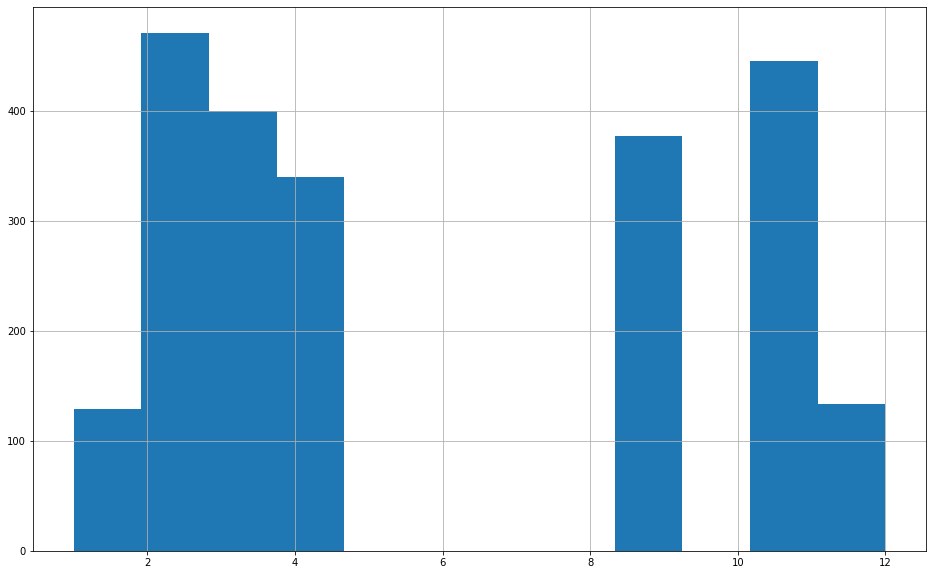

In [787]:
dates_alise.hist(figsize=(16,10),bins=12)

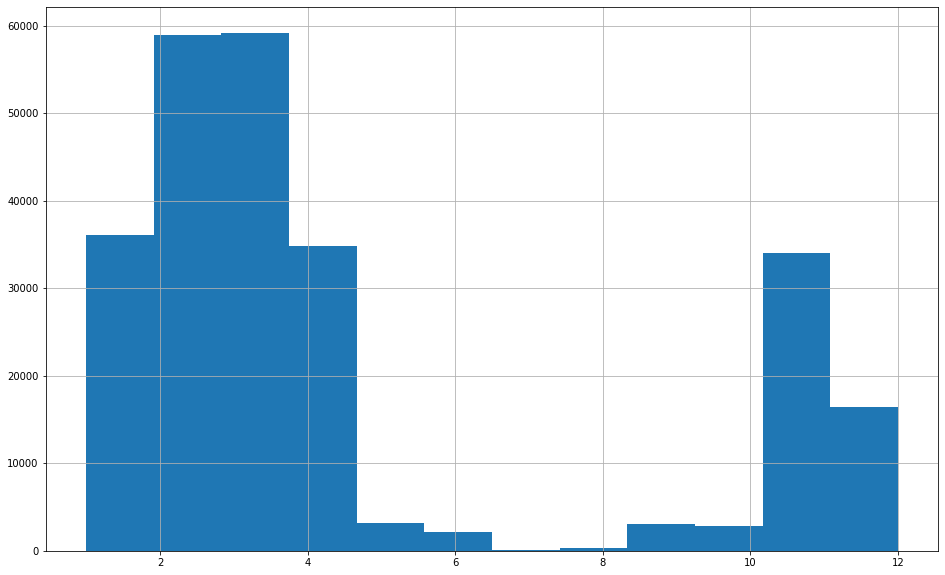

In [788]:
pd.to_datetime(train_df[train_df['target']==0]['time1']).apply(lambda x: x.month).hist(figsize=(16,10),bins=12)

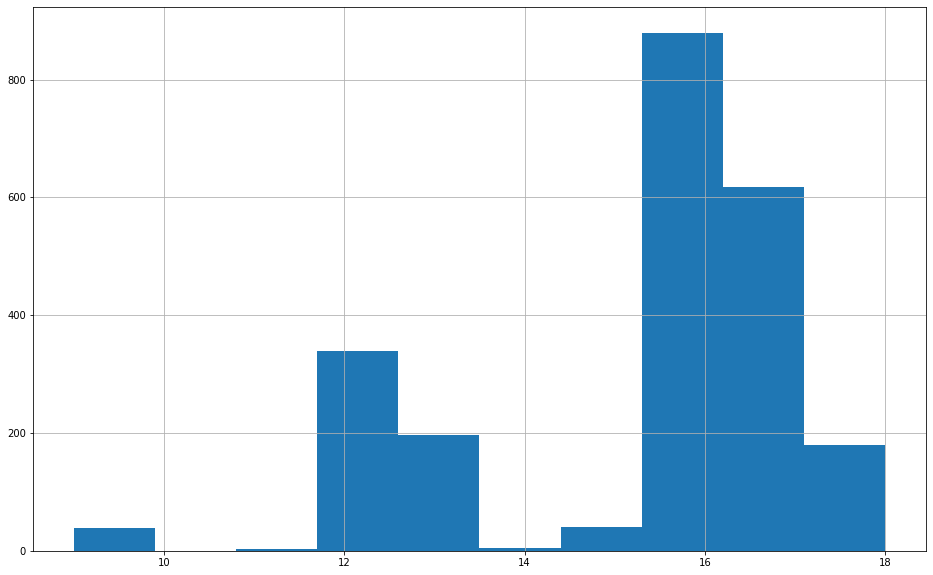

In [793]:
pd.to_datetime(train_df[train_df['target']==1]['time1']).apply(lambda x: x.time().hour).hist(figsize=(16,10))

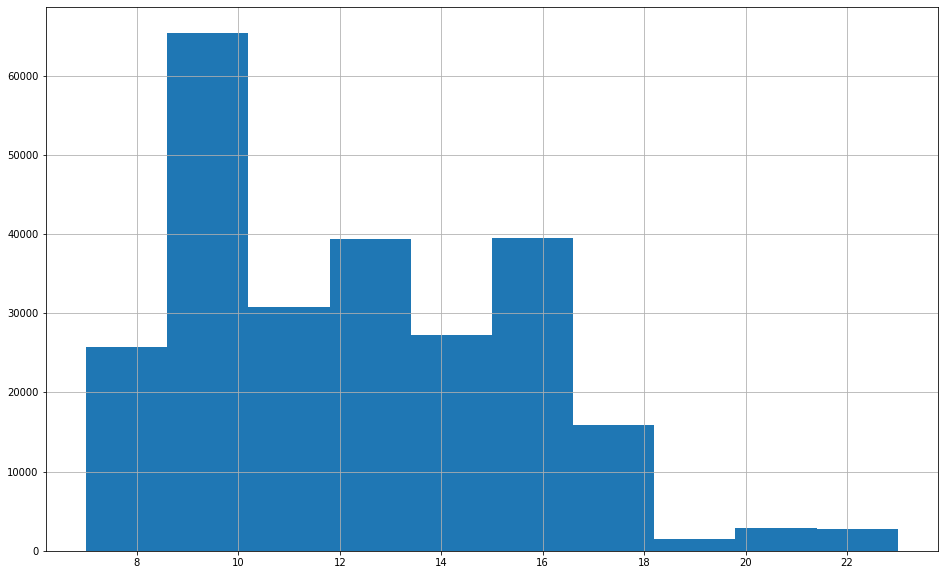

In [794]:
pd.to_datetime(train_df[train_df['target']==0]['time1']).apply(lambda x: x.time().hour).hist(figsize=(16,10))

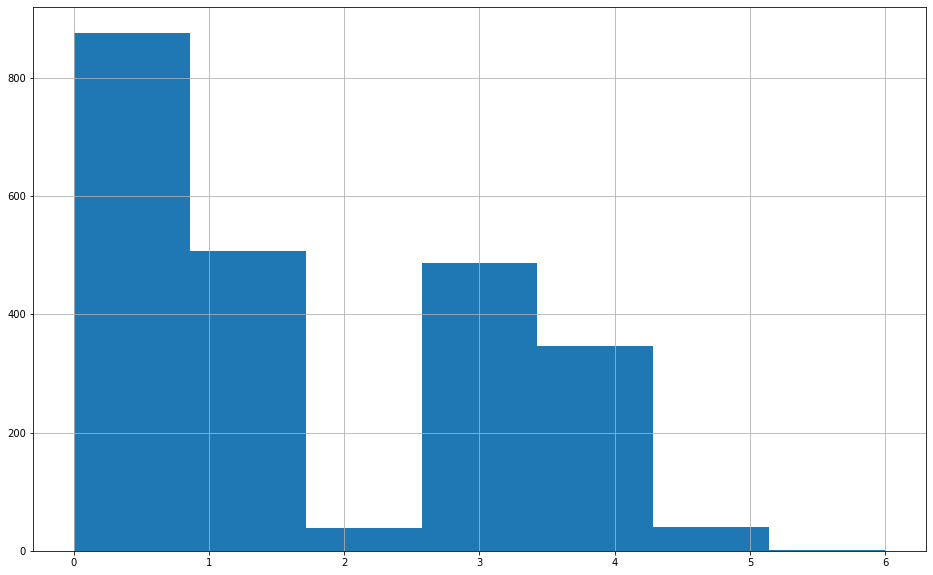

In [838]:
pd.to_datetime(train_df[train_df['target']==1]['time1']).apply(lambda x: x.weekday()).hist(figsize=(16,10),bins=7)

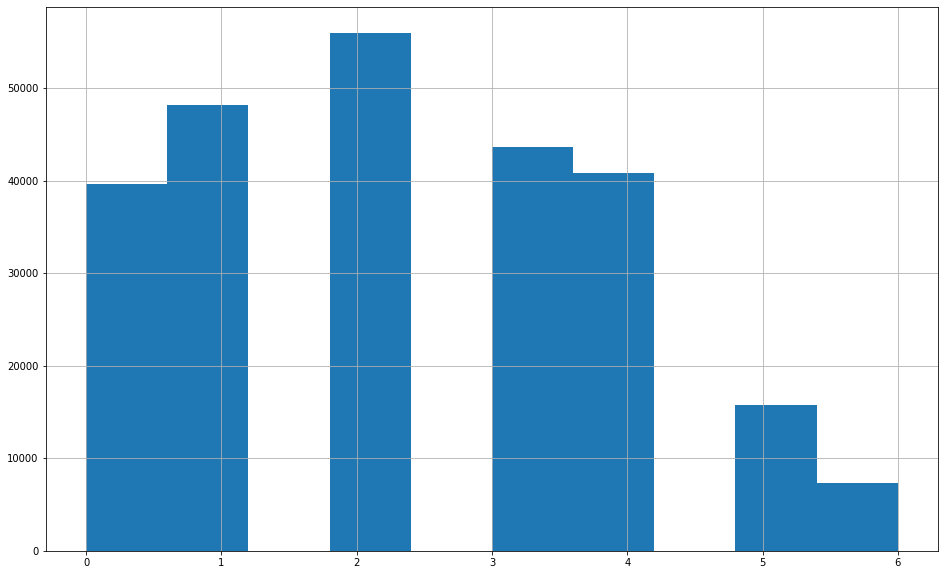

In [796]:
pd.to_datetime(train_df[train_df['target']==0]['time1']).apply(lambda x: x.weekday()).hist(figsize=(16,10))

In [893]:
sum(train_df[train_df['target']==1]['site9']>25000)

131

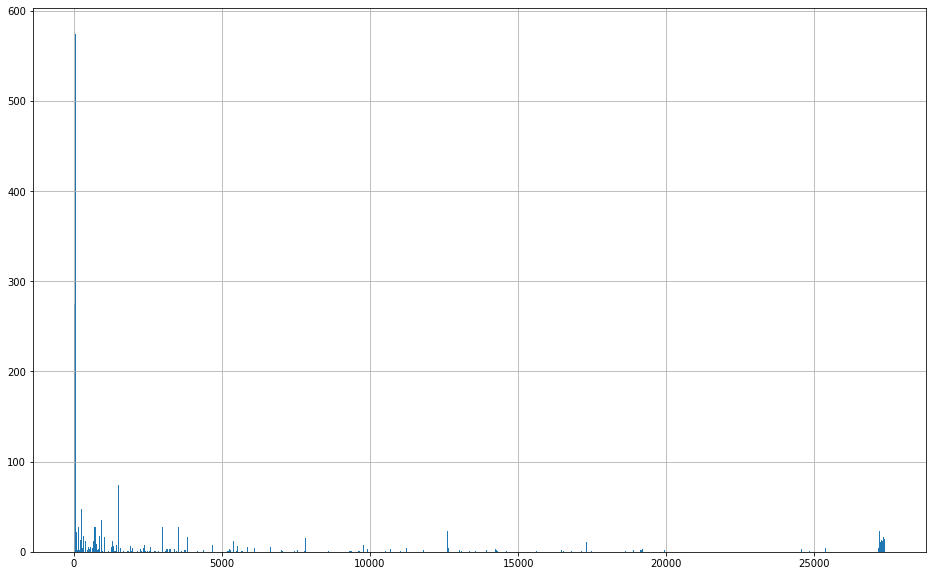

In [891]:
train_df[train_df['target']==1]['site9'].hist(figsize=(16,10),bins=1000)

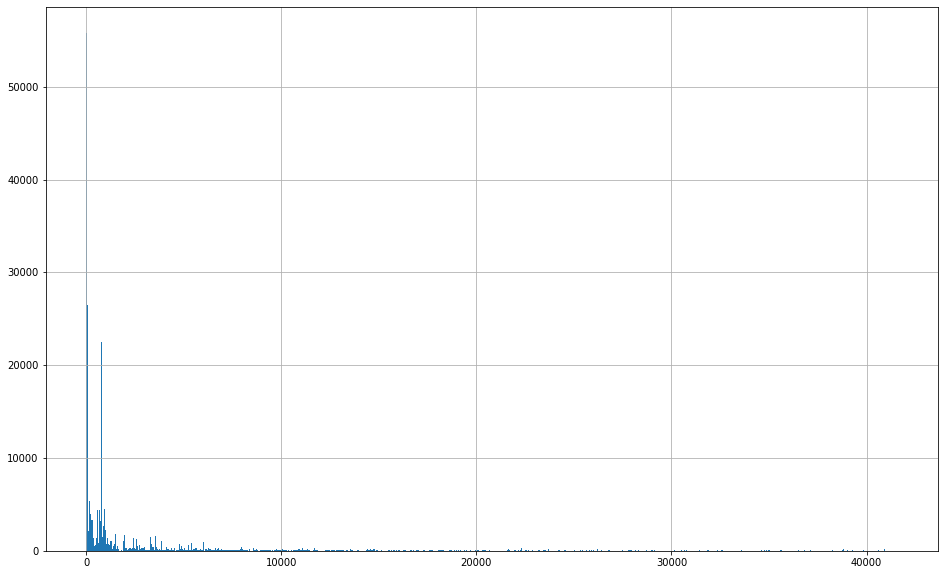

In [801]:
train_df[train_df['target']==0]['site1'].hist(figsize=(16,10),bins=1000)

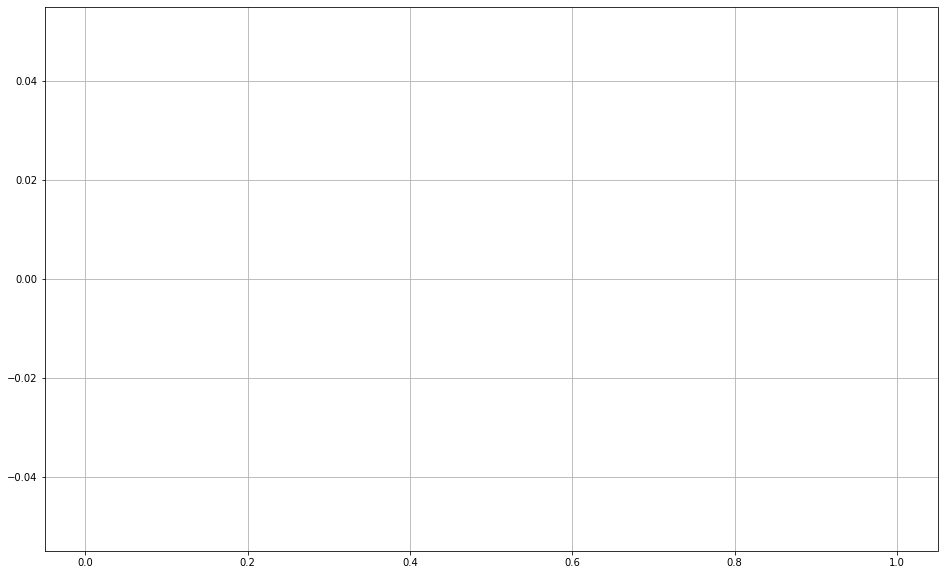

In [897]:
train_df[train_df['target']==1]['site1'][train_df[train_df['target']==1]['site1'] >28000].hist(figsize=(16,10),bins=1000)

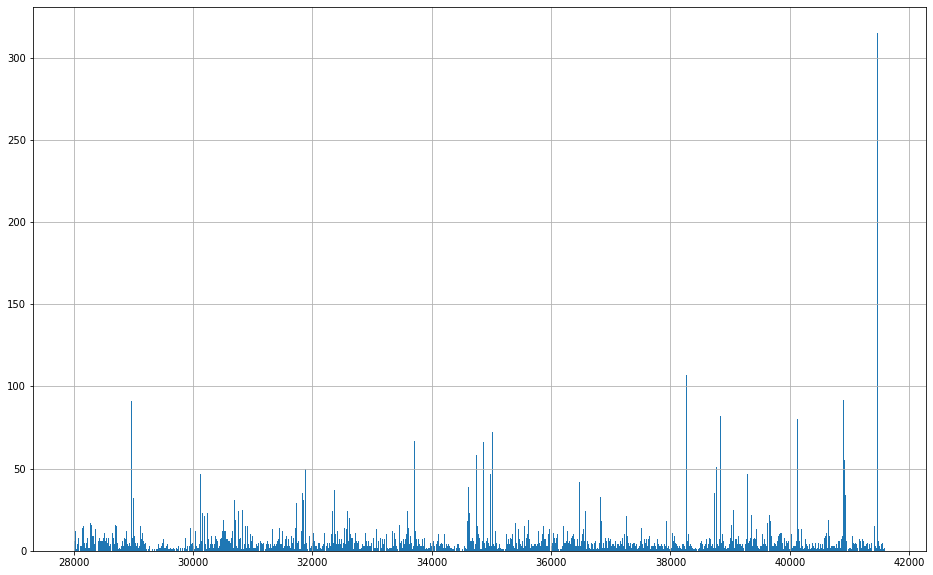

In [896]:
train_df[train_df['target']==0]['site1'][train_df[train_df['target']==0]['site1'] >28000].hist(figsize=(16,10),bins=1000)

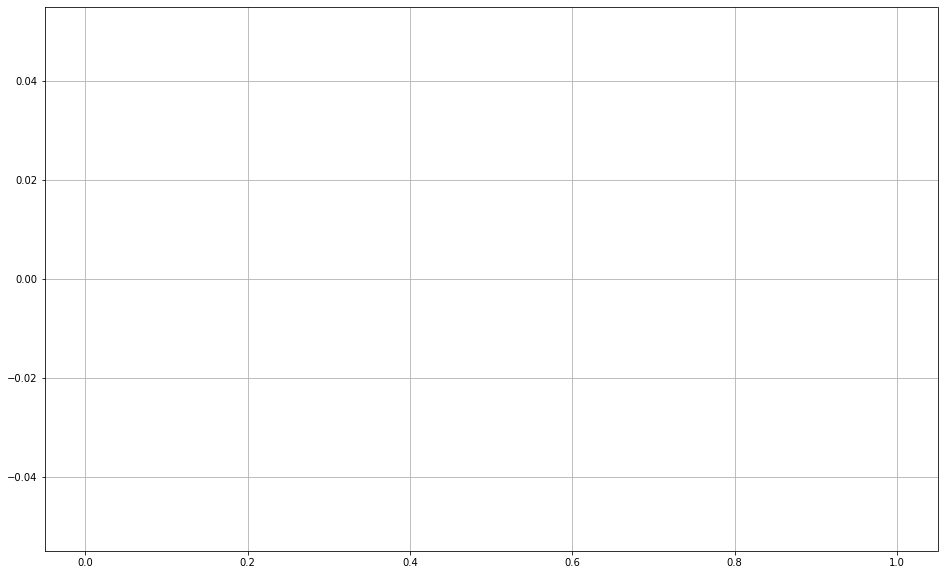

In [895]:
train_df[train_df['target']==1]['site2'][train_df[train_df['target']==1]['site2']>28000].hist(figsize=(16,10),bins=1000)

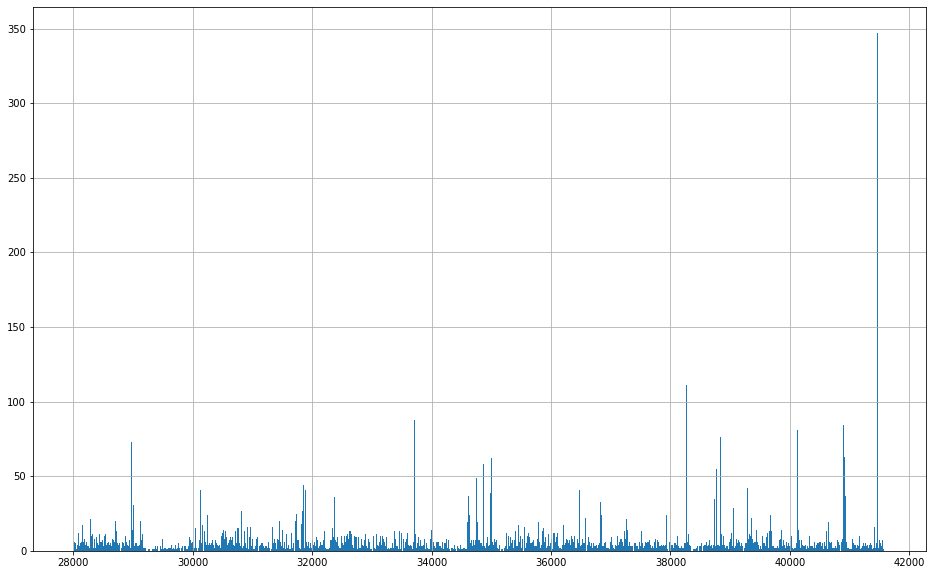

In [894]:
train_df[train_df['target']==0]['site2'][train_df[train_df['target']==0]['site2']>28000].hist(figsize=(16,10),bins=1000)

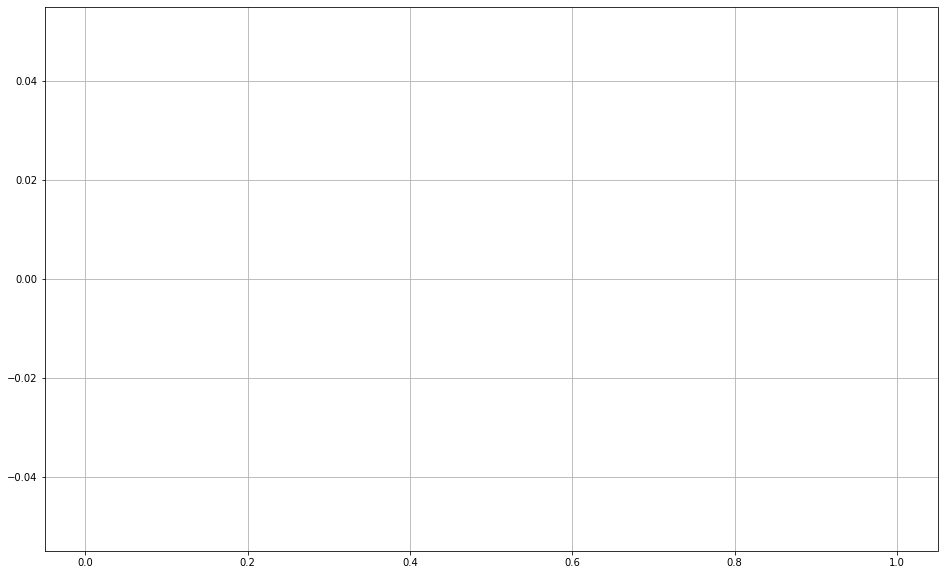

In [817]:
train_df[train_df['target']==1]['site3'][train_df[train_df['target']==1]['site3']>28000].hist(figsize=(16,10),bins=1000)

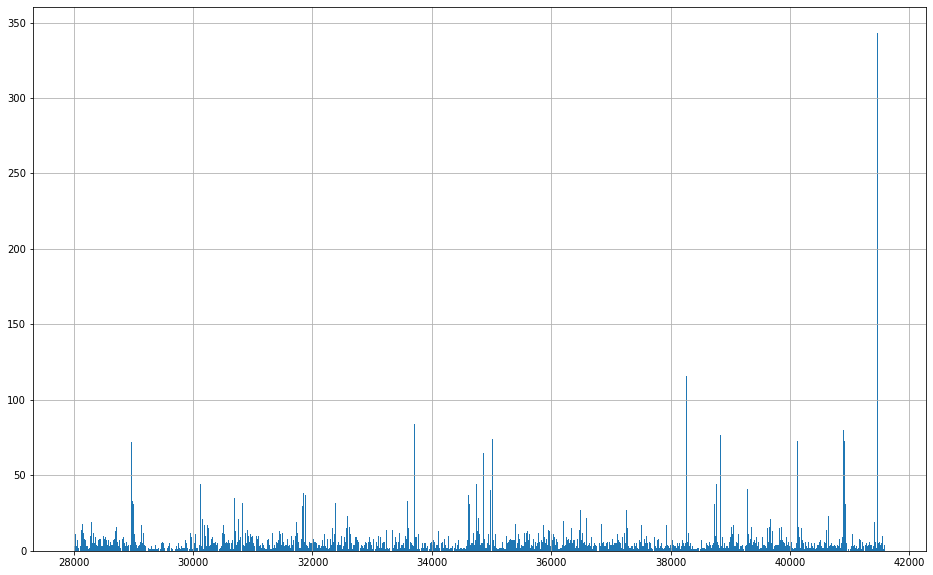

In [818]:
train_df[train_df['target']==0]['site3'][train_df[train_df['target']==0]['site3']>28000].hist(figsize=(16,10),bins=1000)

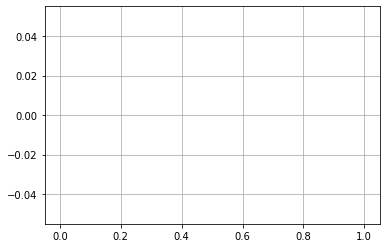

In [822]:
train_df[train_df['target']==1]['site4'][train_df[train_df['target']==1]['site4']>28000].hist(bins=1000)

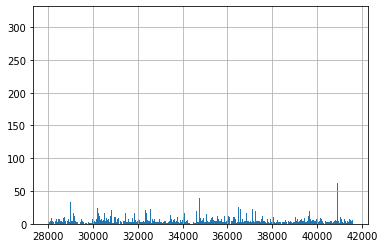

In [820]:
train_df[train_df['target']==0]['site4'][train_df[train_df['target']==0]['site4']>28000].hist(bins=1000)

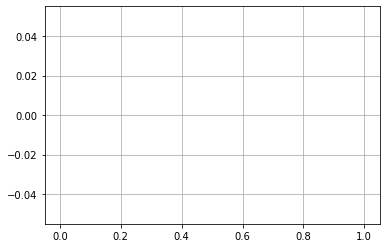

In [823]:
train_df[train_df['target']==1]['site5'][train_df[train_df['target']==1]['site5']>28000].hist(bins=1000)

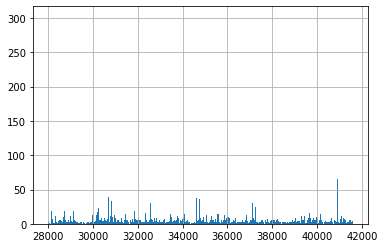

In [824]:
train_df[train_df['target']==0]['site5'][train_df[train_df['target']==0]['site5']>28000].hist(bins=1000)

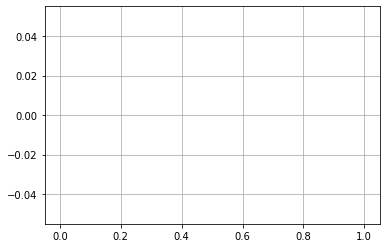

In [825]:
train_df[train_df['target']==1]['site6'][train_df[train_df['target']==1]['site6']>28000].hist(bins=1000)

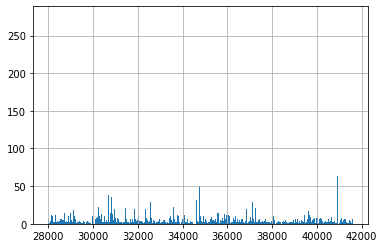

In [826]:
train_df[train_df['target']==0]['site6'][train_df[train_df['target']==0]['site6']>28000].hist(bins=1000)

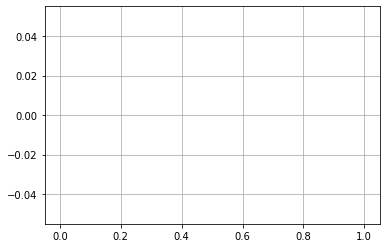

In [827]:
train_df[train_df['target']==1]['site7'][train_df[train_df['target']==1]['site7']>28000].hist(bins=1000)

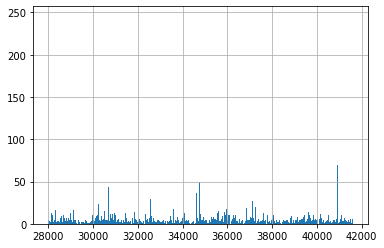

In [828]:
train_df[train_df['target']==0]['site7'][train_df[train_df['target']==0]['site7']>28000].hist(bins=1000)

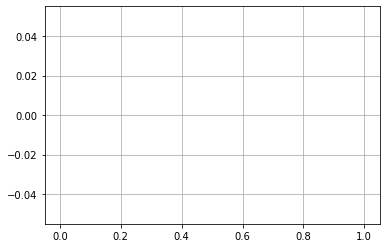

In [829]:
train_df[train_df['target']==1]['site8'][train_df[train_df['target']==1]['site8']>28000].hist(bins=1000)

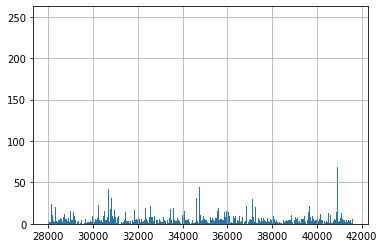

In [830]:
train_df[train_df['target']==0]['site8'][train_df[train_df['target']==0]['site8']>28000].hist(bins=1000)

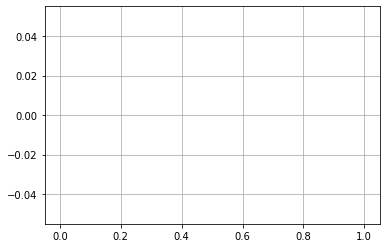

In [831]:
train_df[train_df['target']==1]['site9'][train_df[train_df['target']==1]['site9']>28000].hist(bins=1000)

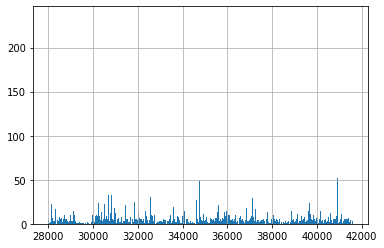

In [836]:
train_df[train_df['target']==0]['site9'][train_df[train_df['target']==0]['site9']>28000].hist(bins=1000)

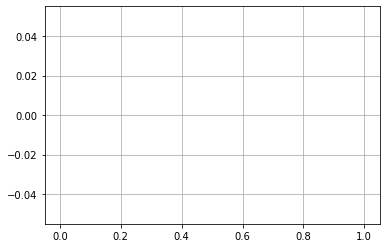

In [833]:
train_df[train_df['target']==1]['site10'][train_df[train_df['target']==1]['site10']>28000].hist(bins=1000)

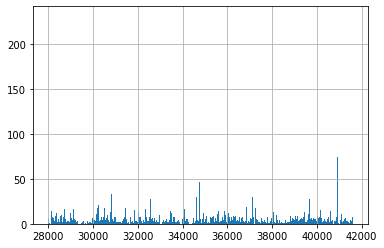

In [835]:
train_df[train_df['target']==0]['site10'][train_df[train_df['target']==0]['site10']>28000].hist(bins=1000)

Алиса - не сидит в 5,6,10 месяце,после 18 часов,а также у нее нет ID сайтов > 28000.

In [931]:
np.array(month==5,dtype=int) + np.array(month==6,dtype=int) + np.array(month==10,dtype=int)

array([0, 0, 0, ..., 1, 1, 0])

In [912]:
is5_6_10_month=np.array(month==5,dtype=int) + np.array(month==6,dtype=int) + np.array(month==10,dtype=int)
is5_6_10_month = is5_6_10_month.reshape((fes_id_over_28000.shape[0],1))
is5_6_10_month.shape

(336358, 1)

In [932]:
is5_6_10_month

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [913]:
fes_id_over_28000 = np.array(train_test_df_sites>28000,dtype=int)
fes_id_over_28000.shape


(336358, 10)

In [934]:
np.array(day_of_week == 2,dtype=int) + np.array(day_of_week == 5,dtype=int) + np.array(day_of_week == 6,dtype=int)

array([0, 1, 0, ..., 0, 1, 1])

In [911]:
is_wed_sat_sun = np.array(day_of_week == 2,dtype=int) + np.array(day_of_week == 5,dtype=int) + np.array(day_of_week == 6,dtype=int)
is_wed_sat_sun = is_wed_sat_sun.reshape((fes_id_over_28000.shape[0],1))
is_wed_sat_sun.shape

(336358, 1)

In [933]:
is_wed_sat_sun

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [917]:
fe_to_add_diff = np.hstack((is5_6_10_month,is_wed_sat_sun,fes_id_over_28000))
fe_to_add_diff.shape

(336358, 12)

In [918]:
X_train_sparse6 = hstack((train_test_sparse_tfidf[:253561],added_fe1[:253561],\
                          added_fe_cat1.values[:253561],added_fe_cat2.values[:253561],\
                          added_fe_cat3.values[:253561],added_fe_cat4.values[:253561],\
                          added_fe_cat5.values[:253561],added_fe_cat6.values[:253561],\
                          added_fe_cat7.values[:253561],added_fe_counts_top5[:253561],\
                          added_fe_cat8.values[:253561],added_fe_cat9.values[:253561],added_fe_cat10.values[:253561],\
                          fe_to_add_diff[:253561]))
X_test_sparse6 = hstack((train_test_sparse_tfidf[253561:],added_fe1[253561:],\
                         added_fe_cat1.values[253561:],added_fe_cat2.values[253561:],\
                         added_fe_cat3.values[253561:],added_fe_cat4.values[253561:],\
                         added_fe_cat5.values[253561:],added_fe_cat6.values[253561:],\
                         added_fe_cat7.values[253561:],added_fe_counts_top5[253561:],\
                         added_fe_cat8.values[253561:],added_fe_cat9.values[253561:],added_fe_cat10.values[253561:],\
                         fe_to_add_diff[253561:]))

In [919]:
%%time
sgd_logit_grid33 = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)
sgd_logit_grid33.fit(X_train_sparse6,y)
logit_test_pred_proba33 = sgd_logit_grid33.predict_proba(X_test_sparse6)
logit_test_pred_proba33[:,1]

Wall time: 11 s


array([2.98723990e-05, 7.99095876e-05, 1.64694284e-03, ...,
       9.28202496e-04, 2.07676974e-05, 2.07939252e-05])

In [920]:
%%time
gb_clf33 = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=100)
gb_clf33.fit(X_train_sparse6,y)
gb_test_pred_proba33 = gb_clf33.predict_proba(X_test_sparse6)
gb_test_pred_proba33[:,1]

Wall time: 4min 37s


array([1.15193325e-05, 1.36331391e-05, 1.75652476e-05, ...,
       1.40049542e-05, 2.99758467e-05, 3.96532596e-05], dtype=float32)

In [921]:
%%time
forest_clf33 = RandomForestClassifier(n_estimators = 150, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
forest_clf33.fit(X_train_sparse6,y)
forest_test_pred_proba33 = forest_clf33.predict_proba(X_test_sparse6)
forest_test_pred_proba33[:,1]

Wall time: 24min 34s


array([0.        , 0.00666667, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [922]:
blended_test_pred_proba33 = (logit_test_pred_proba33[:,1]+gb_test_pred_proba33[:,1] + forest_test_pred_proba33[:,1])/3
blended_test_pred_proba33

array([1.37972438e-05, 2.25340313e-03, 5.54836030e-04, ...,
       3.14069150e-04, 1.69145147e-05, 2.01490616e-05])

In [923]:
write_to_submission_file(blended_test_pred_proba33,out_file='submission26_tfidf_fe_new_blended_l_b_f.csv')

Качество ухудшилось на 3 процента относительно признакового описания X4. Проверим качество отдельно каждого алгоритма.

In [925]:
X_train6, X_valid6, y_train6, y_valid6 = train_test_split(X_train_sparse6, y, 
                                                      test_size=0.3, 
                                                     shuffle=False)

In [927]:
%%time 
sgd_logit_grid_new = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)

sgd_logit_grid_new.fit(X_train6,y_train6)
ROC_AUC_test_fe_new1 = roc_auc_score(y_valid6,sgd_logit_grid_new.predict_proba(X_valid6)[:,1])
print(round(ROC_AUC_test_fe_new1,4))

0.9868
Wall time: 6.74 s


In [928]:
%%time
gb_clf_new = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=150)
gb_clf_new.fit(X_train6,y_train6)
ROC_AUC_test_fe_new2 = roc_auc_score(y_valid6,gb_clf_new.predict_proba(X_valid6)[:,1])

print(round(ROC_AUC_test_fe_new2,3))

0.994
Wall time: 4min 55s


In [929]:
%%time 
forest_clf_new = RandomForestClassifier(n_estimators = 150, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
forest_clf_new.fit(X_train6,y_train6)
ROC_AUC_test_fe_new3 = roc_auc_score(y_valid6,forest_clf_new.predict_proba(X_valid6)[:,1])
print(round(ROC_AUC_test_fe_new3,4))

0.995
Wall time: 13min 57s


In [930]:
%%time 
NB_clf_new = MultinomialNB(alpha=0.0004,fit_prior=True)
NB_clf_new.fit(X_train6,y_train6)
ROC_AUC_test_fe_new4 = roc_auc_score(y_valid6,NB_clf_new.predict_proba(X_valid6)[:,1])
print(round(ROC_AUC_test_fe_new4,4))

0.9866
Wall time: 228 ms


In [935]:
%%time
NB_clf3 = MultinomialNB(alpha=0.0004,fit_prior=True)
NB_clf3.fit(X_train_sparse6,y)
NB_test_pred_proba2 = NB_clf3.predict_proba(X_test_sparse6)
NB_test_pred_proba2[:,1]

Wall time: 684 ms


array([4.09420434e-25, 2.11333013e-20, 6.38521198e-10, ...,
       6.61528229e-19, 2.91347737e-29, 9.47561137e-18])

In [936]:
blended_test_pred_proba44 = (logit_test_pred_proba33[:,1]+gb_test_pred_proba33[:,1] + forest_test_pred_proba33[:,1]+NB_test_pred_proba2[:,1])/4
blended_test_pred_proba44

array([1.03479329e-05, 1.69005235e-03, 4.16127182e-04, ...,
       2.35551863e-04, 1.26858860e-05, 1.51117962e-05])

In [937]:
write_to_submission_file(blended_test_pred_proba44,out_file='submission27_tfidf_fe_new_blended_l_b_f_nb.csv')

In [938]:
blended_test_pred_proba55 = (logit_test_pred_proba33[:,1]+gb_test_pred_proba33[:,1])/2
blended_test_pred_proba55

array([2.06958657e-05, 4.67713634e-05, 8.32254045e-04, ...,
       4.71103725e-04, 2.53717721e-05, 3.02235924e-05])

In [941]:
write_to_submission_file(blended_test_pred_proba55,out_file='submission28_tfidf_fe_new_blended_l_b.csv')

In [942]:
write_to_submission_file(logit_test_pred_proba33[:,1],out_file='submission29_tfidf_fe_new_l.csv')


Улучшения по качеству с дополнительными признаками, характеризуюшими Алису, не последовало, хотя качество на отложенной выборке было чуть лучше, но совсем незначительно и ,вероятно, статистически не значимо. При этом, негативным фактором является то, что отличия проявляются на малом числе сессий.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266CEE19A90>]],
      dtype=object)

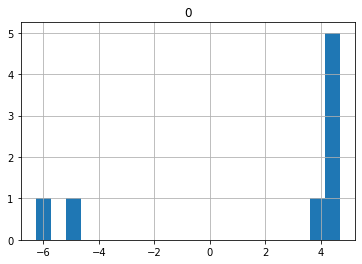

In [959]:
coef_df = pd.DataFrame(sgd_logit_grid2.coef_).T
coef_df[abs(coef_df)>4].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266CEE19D68>]],
      dtype=object)

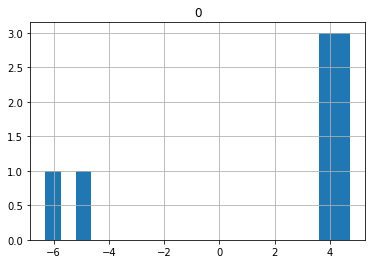

In [960]:
coef_df = pd.DataFrame(sgd_logit_grid33.coef_).T
coef_df[abs(coef_df)>4].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266D53FB198>]],
      dtype=object)

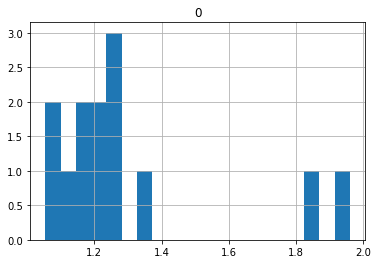

In [964]:
coef_df = pd.DataFrame(sgd_logit.coef_).T
coef_df[abs(coef_df>1)].hist(bins=20)

Попробуем применить признаки времени просмотра сайтов в сессии

In [965]:
session_times.head()

,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10
session_id,,,,,,,,,,
1,1.392891e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09
3,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09
4,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09
5,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09


In [968]:
session_times.columns

Index(['sec1', 'sec2', 'sec3', 'sec4', 'sec5', 'sec6', 'sec7', 'sec8', 'sec9',
       'sec10'],
      dtype='object')

In [970]:
for ind, col in enumerate(session_times.columns):
    if ind > 0:
        session_times[f'dur{ind}'] =  session_times[col] - session_times[session_times.columns[ind-1]]
session_times.head()
        
        

,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,dur1,dur2,dur3,dur4,dur5,dur6,dur7,dur8,dur9
session_id,,,,,,,,,,,,,,,,,,,
1,1.392891e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.392891e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,0.000000e+00,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0
3,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.000000e+00,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,3.000000e+01,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
5,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.370000e+02,0.0,1.0,0.0,36.0,0.0,0.0,67.0,5.0


In [971]:
durations = session_times[[f'dur{i}' for i in range(1,10)]]
durations.head()

,dur1,dur2,dur3,dur4,dur5,dur6,dur7,dur8,dur9
session_id,,,,,,,,,
1,-1.392891e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000e+00,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0
3,1.000000e+00,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
4,3.000000e+01,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
5,1.370000e+02,0.0,1.0,0.0,36.0,0.0,0.0,67.0,5.0


In [972]:
dur_array = np.array(durations,dtype = float)
dur_array 

array([[-1.39289056e+09,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.30000000e+01,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  7.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.40000000e+01, ...,
         3.00000000e+00,  2.40000000e+01,  5.00000000e+00]])

In [975]:
durations

,dur1,dur2,dur3,dur4,dur5,dur6,dur7,dur8,dur9
session_id,,,,,,,,,
1,-1.392891e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
2,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,23.0,1.000000e+00
3,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00,1.0,2.000000e+00
4,3.000000e+01,30.0,3.000000e+01,3.000000e+01,3.000000e+01,30.0,3.000000e+01,30.0,3.000000e+01
5,1.370000e+02,0.0,1.000000e+00,0.000000e+00,3.600000e+01,0.0,0.000000e+00,67.0,5.000000e+00
6,8.000000e+00,263.0,4.100000e+01,3.740000e+02,-1.395157e+09,0.0,0.000000e+00,0.0,0.000000e+00
7,0.000000e+00,0.0,0.000000e+00,3.000000e+01,6.900000e+01,0.0,1.000000e+00,1.0,1.000000e+00
8,0.000000e+00,2.0,1.000000e+00,0.000000e+00,0.000000e+00,0.0,2.000000e+00,0.0,1.000000e+00
9,2.700000e+01,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.0,1.600000e+01,0.0,1.000000e+00


In [974]:
for i,session in enumerate(dur_array):
    for j,dur in enumerate(session):
        if dur < 0:
            if j==0:
                dur_array[i,j]=30*60
            else:
                dur_array[i,j]=30*60 - sum(session[:j])
pd.DataFrame(dur_array)

,0,1,2,3,4,5,6,7,8
0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
3,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
4,137.0,0.0,1.0,0.0,36.0,0.0,0.0,67.0,5.0
5,8.0,263.0,41.0,374.0,1114.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,30.0,69.0,0.0,1.0,1.0,1.0
7,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
8,27.0,0.0,0.0,1.0,0.0,0.0,16.0,0.0,1.0
9,55.0,0.0,0.0,16.0,0.0,5.0,10.0,1.0,0.0


Отмасштабируем данные признаки

In [976]:
from sklearn.preprocessing import StandardScaler


In [979]:
scaler = StandardScaler().fit(dur_array)
time_fee_to_add= scaler.transform(dur_array)
time_fee_to_add

array([[ 7.43082048e+00, -1.86990210e-01, -1.77756240e-01, ...,
        -1.64688560e-01, -1.63647797e-01, -1.62573577e-01],
       [-1.92170448e-01, -1.82398417e-01, -1.77756240e-01, ...,
        -1.64688560e-01, -5.31634573e-03, -1.55492496e-01],
       [-1.87935453e-01, -1.82398417e-01, -1.77756240e-01, ...,
        -1.57804765e-01, -1.56763821e-01, -1.48411414e-01],
       ...,
       [-1.92170448e-01, -1.86990210e-01, -1.40489900e-01, ...,
        -1.57804765e-01, -1.63647797e-01, -1.62573577e-01],
       [-1.83700458e-01, -1.86990210e-01, -1.77756240e-01, ...,
        -1.57804765e-01, -1.63647797e-01, -1.62573577e-01],
       [-1.92170448e-01, -1.82398417e-01, -1.03223559e-01, ...,
        -1.44037176e-01,  1.56763044e-03, -1.27168169e-01]])

In [980]:
time_fee_to_add.shape

(336358, 9)

In [981]:
X_train_sparse7 = hstack((train_test_sparse_tfidf[:253561],added_fe1[:253561],\
                          added_fe_cat1.values[:253561],added_fe_cat2.values[:253561],\
                          added_fe_cat3.values[:253561],added_fe_cat4.values[:253561],\
                          added_fe_cat5.values[:253561],added_fe_cat6.values[:253561],\
                          added_fe_cat7.values[:253561],added_fe_counts_top5[:253561],\
                          added_fe_cat8.values[:253561],added_fe_cat9.values[:253561],added_fe_cat10.values[:253561],\
                          time_fee_to_add[:253561]))
X_test_sparse7 = hstack((train_test_sparse_tfidf[253561:],added_fe1[253561:],\
                         added_fe_cat1.values[253561:],added_fe_cat2.values[253561:],\
                         added_fe_cat3.values[253561:],added_fe_cat4.values[253561:],\
                         added_fe_cat5.values[253561:],added_fe_cat6.values[253561:],\
                         added_fe_cat7.values[253561:],added_fe_counts_top5[253561:],\
                         added_fe_cat8.values[253561:],added_fe_cat9.values[253561:],added_fe_cat10.values[253561:],\
                         time_fee_to_add[253561:]))

In [982]:
%%time
sgd_logit_grid55 = SGDClassifier(loss='log',alpha=0.00005,class_weight='balanced',random_state=17,\
                          learning_rate = 'adaptive',eta0=0.01)
sgd_logit_grid55.fit(X_train_sparse7,y)
logit_test_pred_proba55 = sgd_logit_grid55.predict_proba(X_test_sparse7)
logit_test_pred_proba55[:,1]

Wall time: 10.2 s


array([1.90207776e-04, 2.96780573e-05, 2.43271524e-04, ...,
       2.45830778e-03, 5.54756718e-06, 1.28149259e-06])

In [983]:
write_to_submission_file(logit_test_pred_proba55[:,1],out_file='submission30_tfidf_fe_new_new_l.csv')

In [984]:
%%time
gb_clf55 = xgb.XGBClassifier(learning_rate=0.5,max_depth=7, min_child_weight=1, random_state=17,n_estimators=100)
gb_clf55.fit(X_train_sparse7,y)
gb_test_pred_proba55 = gb_clf55.predict_proba(X_test_sparse7)
gb_test_pred_proba55[:,1]

Wall time: 5min 34s


array([7.1680479e-06, 4.0890718e-06, 5.6849771e-05, ..., 2.9966499e-05,
       9.4940970e-06, 4.2865035e-05], dtype=float32)

In [985]:
%%time
forest_clf55 = RandomForestClassifier(n_estimators = 150, class_weight='balanced',criterion='gini',min_samples_split= 7, random_state=17)
forest_clf55.fit(X_train_sparse7,y)
forest_test_pred_proba55 = forest_clf55.predict_proba(X_test_sparse7)
forest_test_pred_proba55[:,1]

Wall time: 14min 7s


array([0., 0., 0., ..., 0., 0., 0.])

In [986]:
blended_test_pred_proba555 = (logit_test_pred_proba55[:,1]+gb_test_pred_proba55[:,1] + forest_test_pred_proba55[:,1])/3
blended_test_pred_proba555

array([6.57919412e-05, 1.12557097e-05, 1.00040432e-04, ...,
       8.29424761e-04, 5.01388805e-06, 1.47155091e-05])

In [988]:
write_to_submission_file(blended_test_pred_proba555,out_file='submission31_tfidf_fe_new_new_blend_l_b_f.csv')

In [989]:
blended_experiment = (blended_test_pred_proba2+blended_test_pred_proba555)/2
blended_experiment

array([7.74582893e-05, 1.59831356e-05, 1.32366336e-03, ...,
       1.96968687e-03, 1.38961708e-05, 1.20346247e-05])

In [990]:
write_to_submission_file(blended_experiment,out_file='submission32_experiment.csv')

Последнее усреднение результата не дало, проседание в качестве.

Итак, финальное качество на тестовой выборке в соревновании 0.95106,что существенно выше двух заявленных бейзлайнов. Сработал Tfidf и признаки в выборке X7 (см. выше). Ключевым фактором стал учет многих признаков как категориальных с использованием dummies, также полезно было отмасштабировать признаки времени пребывания на сайте. Также хорошо себя показало использование разных алгоритмов (чтобы не было корреляции между ними) с последующим усреднением ответов. Использовались логистическая регрессия, градиентный бустинг и случайный лес с подобранными по сетке гиперпараметрами. Наивный байес с мультиномиальными распределениями признаков дал ухудшение в общее качество, поэтому не использовался для финального ответа. Можно ещё рассмотреть влияние наивного байеса с распределением Бернулли, поскольку в выборке большое число нулей и единиц. В любом случае, лучшим ответом стало submission31. 

## Критерии оценки работы (только для Peer Review в специализации):
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`). Это только в случае, если вы проходите специализацию.
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.